In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
 
import warnings
warnings.filterwarnings('ignore')

In [23]:
tracks = pd.read_csv('data_moods.csv')
tracks.head()

,name,album,artist,id,Release_year,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,c,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [18]:
tracks.shape

(686, 19)

In [19]:
tracks.isnull().sum()

name                0
album               0
artist              0
id                  0
Release_year        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
c                   0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

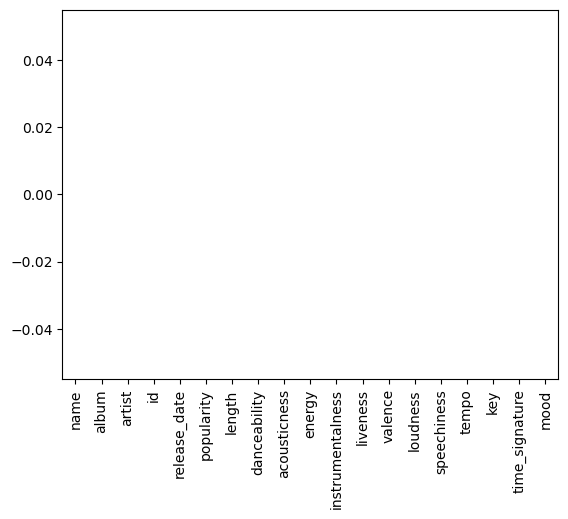

In [5]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()

In [20]:
 
tracks['name'].nunique(), tracks.shape

(686, (686, 19))

In [21]:
 
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['name'], keep='first', inplace=True)

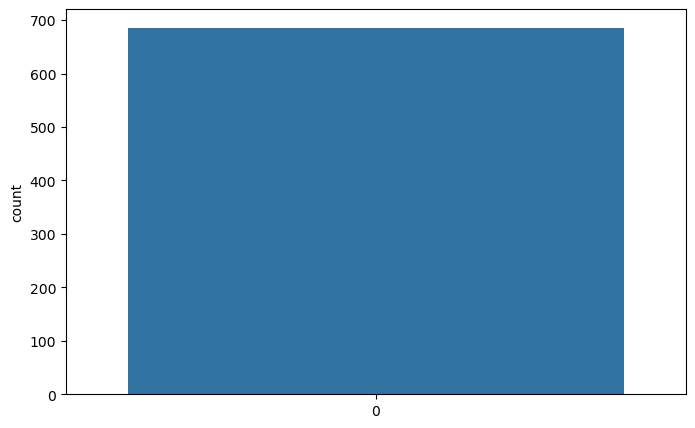

In [28]:
 
plt.figure(figsize = (8, 5))
sb.countplot(tracks['length'])

plt.show()

In [31]:
floats = []
for col in tracks.columns:
  if tracks[col].dtype == 'float':
    floats.append(col)

In [32]:
len(floats)

9

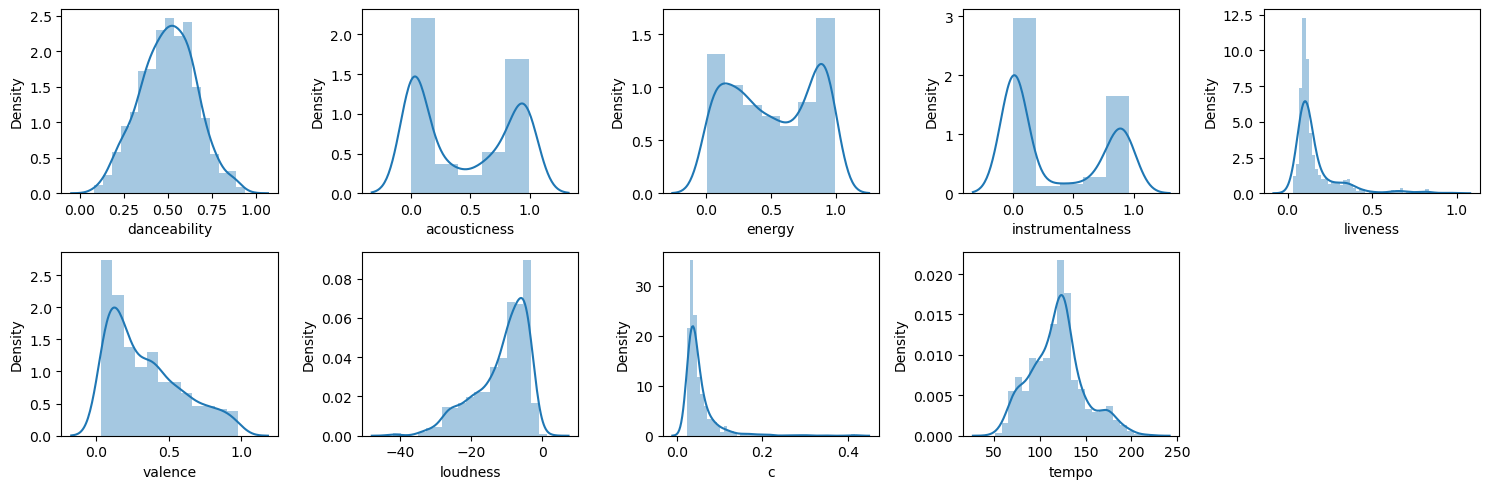

In [33]:
 
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
  plt.subplot(2, 5, i + 1)
  sb.distplot(tracks[col])
plt.tight_layout()
plt.show()

In [36]:
 
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['mood'])

In [37]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)

In [39]:
def get_similarities(song_name, data):
   
  # Getting vector for the input song.
  text_array1 = song_vectorizer.transform(data[data['name']==song_name]['mood']).toarray()
  num_array1 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()
   
  # We will store similarity for each row of the dataset.
  sim = []
  for idx, row in data.iterrows():
    name = row['name']
     
    # Getting vector for current song.
    text_array2 = song_vectorizer.transform(data[data['name']==name]['mood']).toarray()
    num_array2 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()
 
    # Calculating similarities for text as well as numeric features
    text_sim = cosine_similarity(text_array1, text_array2)[0][0]
    num_sim = cosine_similarity(num_array1, num_array2)[0][0]
    sim.append(text_sim + num_sim)
     
  return sim

In [40]:
 
def recommend_songs(song_name, data=tracks):
  # Base case
  if tracks[tracks['name'] == song_name].shape[0] == 0:
    print('This song is either not so popular or you\
    have entered invalid_name.\n Some songs you may like:\n')
     
    for song in data.sample(n=5)['name'].values:
      print(song)
    return
   
  data['similarity_factor'] = get_similarities(song_name, data)
 
  data.sort_values(by=['similarity_factor', 'popularity'],
                   ascending = [False, False],
                   inplace=True)
   
  # First song will be the input song itself as the similarity will be highest.
  display(data[['name', 'artists']][2:7])

In [41]:
recommend_songs('Shape of You')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Light Year
Mindfulness
Bat Country
Daar Gaat Ze
Betty


In [42]:
recommend_songs('Love Someone')

This song is either not so popular or you    have entered invalid_name.
 Some songs you may like:

Mr. Blue Sky
Silver Lining
Heaven - David Guetta & MORTEN Remix
Feeling This
The Temporary


In [ ]:
recommend_songs('Silver Lining')